# Airline Customer Satisfaction Classification Project on Logistic Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Inserting data using read_csv function.
df = pd.read_csv("Invistico_Airline.csv")

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Data Analysis and Visualisation

In [4]:
# Applied df.info() to take a brief idea about the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

* The dataset has 23 columns and 129880 rows.
* As from the above operation we can see that "satisfaction", "Gender", "Customer Type", "Type of Travel" and "Class" has object type data. Rest columns have integer type data.
* "satisfaction" is our output/target column so we dont need to change its datatype or encode its data.

In [5]:
# Checking for null values
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

* As we can see here that only Arrival Delay in Minutes column has null values.

In [6]:
# for the statistical view describe is applied. 
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


* The dataset has normally distributed data as the mean and median (50 % data) is almost equal except for departure and arrival delay columns.

<Axes: xlabel='Gender', ylabel='count'>

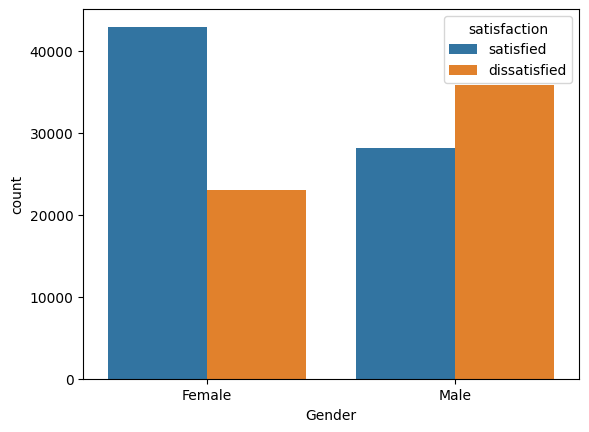

In [7]:
# To compare the "Gender" column with "satisfaction" column, plotted countplot between them.
sns.countplot(x=df["Gender"],hue=df["satisfaction"])

* Data is well distributed, female customers are more satisfied than male customers.
* And more male customers are dissatisfied.

In [8]:
# Value_count() is applied to determine the numbers of male and female customers.
df["Gender"].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [9]:
# Crosstab is another way of representing the numbers of male and female customers who are satisfied and dissatisfied.
pd.crosstab(index=df["satisfaction"],columns=df["Gender"])

Gender,Female,Male
satisfaction,,
dissatisfied,22971,35822
satisfied,42928,28159


<Axes: xlabel='Customer Type', ylabel='count'>

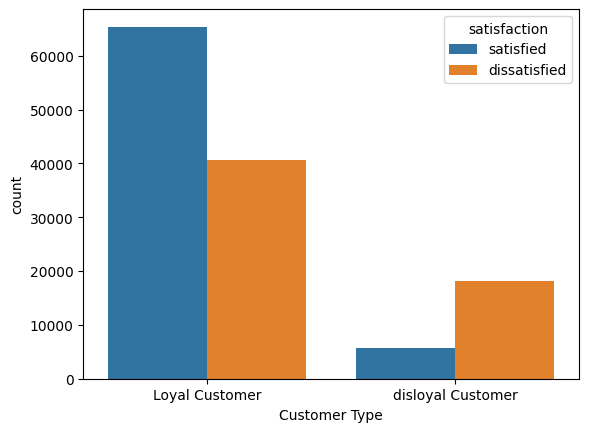

In [10]:
# Next, Compared the "Customer Type" and "satisfaction" columns and for this countplot is plotted.
sns.countplot(x= df["Customer Type"], hue= df["satisfaction"])

* Most of the customers are loyal customer , and in loyal customers most of them are satisfied.
* In disloyal customers ,the number of dissatisfied customers is more.
* loyal = customers who use the services again.
* disloyal = customers who dont use the services again.

<Axes: xlabel='Customer Type', ylabel='count'>

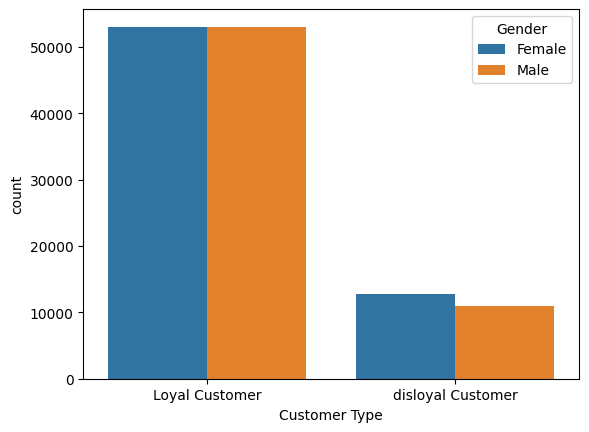

In [11]:
# Next, Compared the "Customer Type" and "Gender" columns and for this countplot is plotted.
sns.countplot(x= df["Customer Type"], hue= df["Gender"])

* In loyal customers, no. of male and female is almost equal.
* And in disloyal customers, no. of female is more than no. of male.

In [12]:
# Crosstab is used to know the exact numbers of loyal and disloyal customers gender wise.
pd.crosstab(index=df["Customer Type"],columns=df["Gender"])

Gender,Female,Male
Customer Type,,
Loyal Customer,53056,53044
disloyal Customer,12843,10937


<Axes: xlabel='Type of Travel', ylabel='count'>

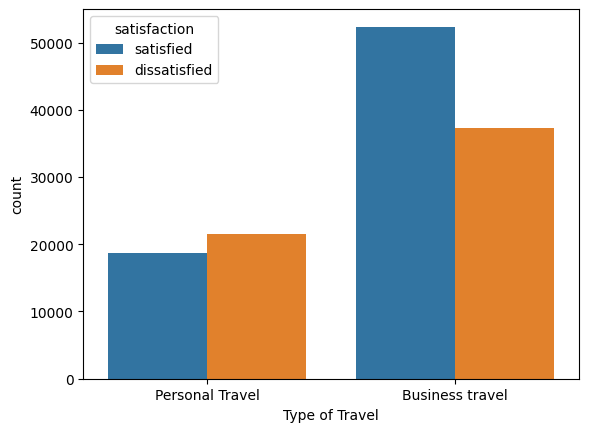

In [13]:
# Next, Compared the "Type of Travel" and "satisfaction" columns and for this countplot is plotted.
sns.countplot(x= df["Type of Travel"], hue= df["satisfaction"])

* By comparing the two columns we got to know that in personal travel more customers are dissatisfied while in business travel more customers are satisfied.

<Axes: xlabel='Type of Travel', ylabel='count'>

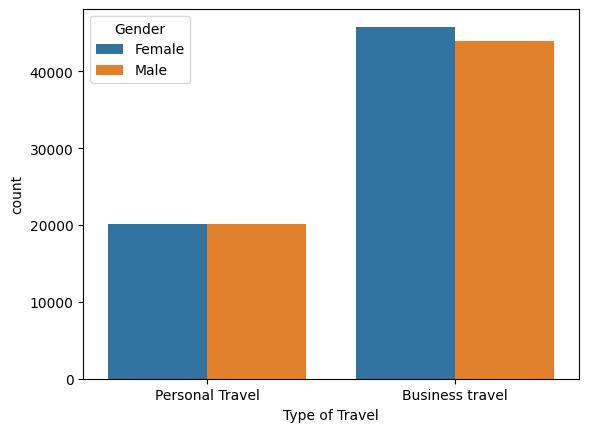

In [14]:
# Again, Compared the "Type of Travel" and "Gender" columns with the help of countplot.
sns.countplot(x= df["Type of Travel"], hue= df["Gender"])

* We can see that in personal travel the no. of male and female is almost equal.
* But in Business travel the female customers are more than male customers.

<Axes: xlabel='Type of Travel', ylabel='count'>

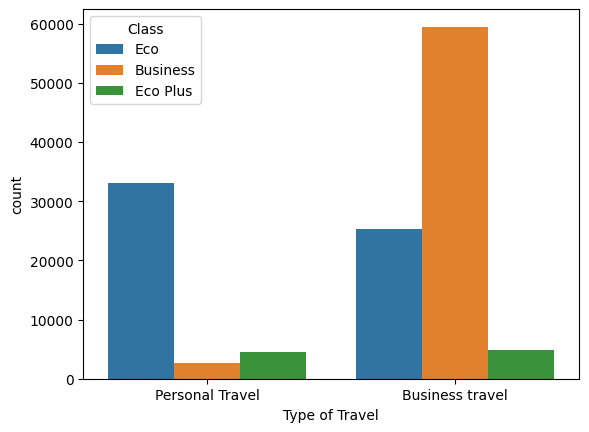

In [15]:
# Compared the "Type of Travel" column and "satisfaction" column.
sns.countplot(x= df["Type of Travel"], hue= df["Class"])

* In personal travel most customers travels in Eco class, and in Business travel most customers travels in Business class.
* Eco Plus class customers are very less in both type of travel.  

<Axes: xlabel='Type of Travel', ylabel='count'>

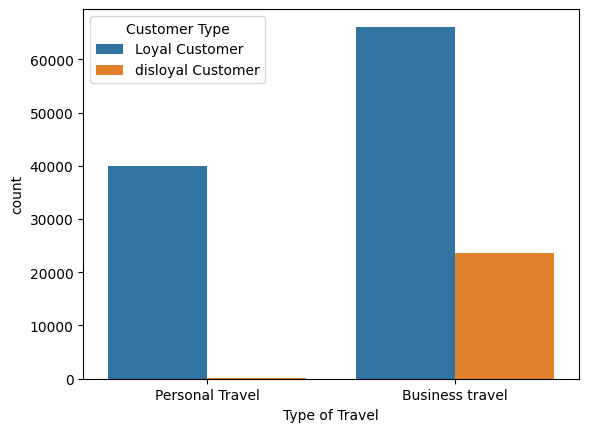

In [16]:
# compared Type of Travel and Customer Type column using countplot.
sns.countplot(x= df["Type of Travel"], hue= df["Customer Type"])

* Both In Personal Travel & Business Travel, no. of Loyal Customer is more than Disloyal Customer.

In [17]:
df["Class"].value_counts()

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

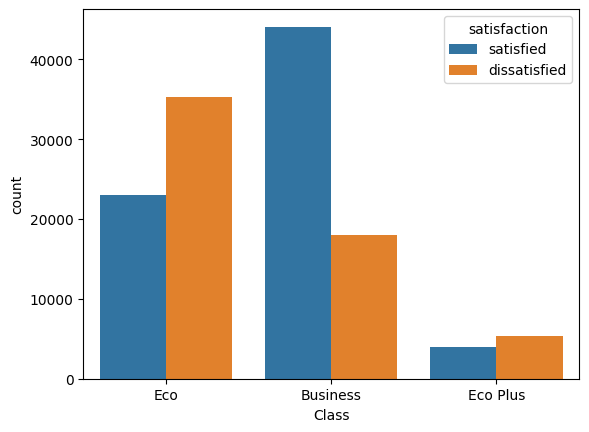

In [18]:
# compared Class and Satisfaction column using countplot.
sns.countplot(x=df["Class"],hue=df["satisfaction"])
plt.show()

* Only in Business Class, No.of satisfied customers are more while in remaining classes, No.of dissatisfied customers are more.

<Axes: xlabel='Age', ylabel='Count'>

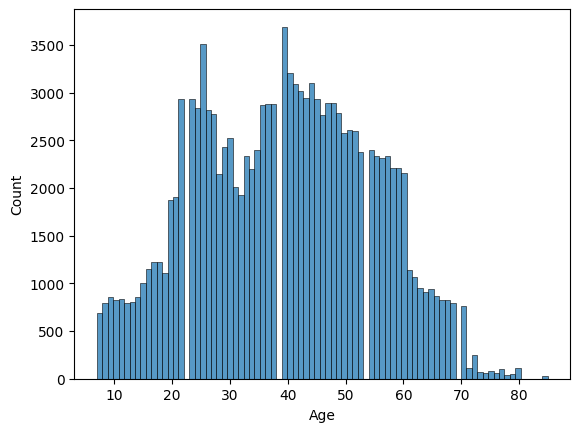

In [19]:
# plotted histplot of Age column to see the variation in Age
sns.histplot(df,x="Age")

* The data in Age Column is nearly normally distributed, most of the customers are of 20-50 age group.

<Axes: >

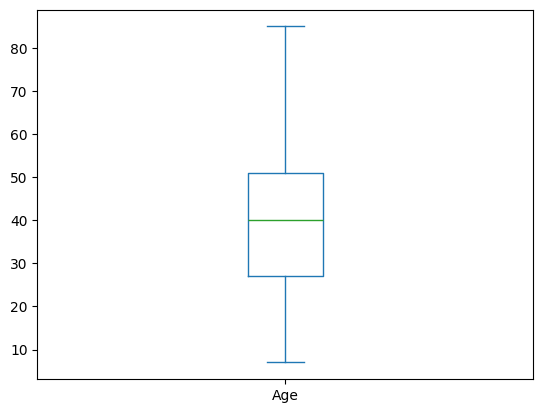

In [20]:
# plotted boxplot of Age column to see the outliers in it.
df["Age"].plot.box()

In [21]:
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0


<Axes: xlabel='Flight Distance', ylabel='Count'>

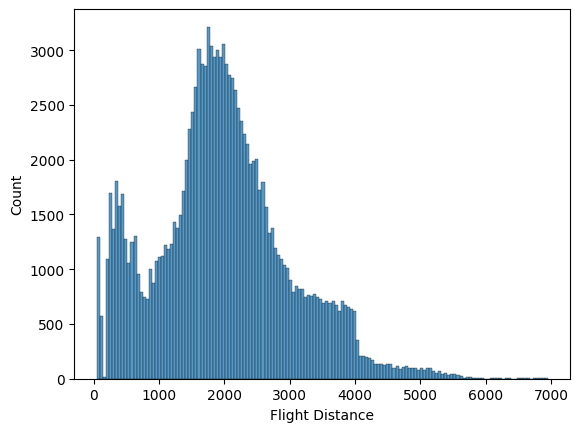

In [22]:
# plotted histplot of Flight Distance column to see the variation in Flight Distance.
sns.histplot(df, x="Flight Distance")

* The data in Flight Distance is nearlly normally distributed with the peak at near 2000 units.

<Axes: >

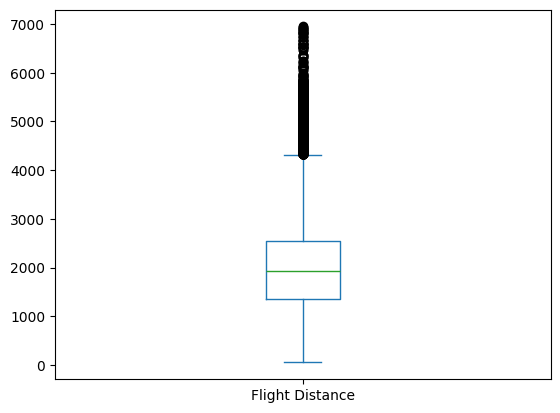

In [23]:
# plotted box plot of flight distance column to visualise the outliers.
df["Flight Distance"].plot.box()

* The boxplot shows that the maximum value of Flight Distance is around 4500 units.

<Axes: >

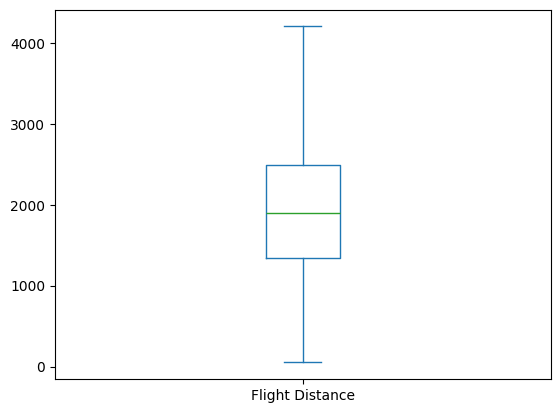

In [24]:
# handling outliers in flight distance using quantile
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]["Flight Distance"].plot.box()

* Outliers are removed by taking values below quantile(0.977).

In [25]:
# to find out the remaining rows after removing outliers.
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]["Flight Distance"].shape

(126896,)

In [26]:
# to see, originally the data has how many rows and columns 
df.shape

(129880, 23)

In [27]:
# removed outlier of Flight Distance by applying it in df.
df=df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]

In [28]:
# to see the top 5 rows of dataset after removing outliers
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [29]:
# to get the information of all columns after removing outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126896 entries, 0 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       126896 non-null  object 
 1   Gender                             126896 non-null  object 
 2   Customer Type                      126896 non-null  object 
 3   Age                                126896 non-null  int64  
 4   Type of Travel                     126896 non-null  object 
 5   Class                              126896 non-null  object 
 6   Flight Distance                    126896 non-null  int64  
 7   Seat comfort                       126896 non-null  int64  
 8   Departure/Arrival time convenient  126896 non-null  int64  
 9   Food and drink                     126896 non-null  int64  
 10  Gate location                      126896 non-null  int64  
 11  Inflight wifi service              126896 no

In [30]:
# to get the statistics of numeric column after removing outliers
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,126896.000000,126896.000000,126896.000000,126896.00000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126520.000000
mean,39.668981,1914.669737,2.840413,2.99074,2.849152,2.989606,3.242301,3.378822,3.518298,3.470787,3.470086,3.490402,3.695680,3.341997,3.708100,3.347190,14.146427,14.527924
std,15.126998,938.325817,1.394102,1.52885,1.443408,1.303912,1.319753,1.348232,1.308372,1.307125,1.269992,1.291948,1.156963,1.260086,1.151048,1.299965,36.217608,36.671598
min,7.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1337.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1901.000000,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,2489.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4204.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<Axes: >

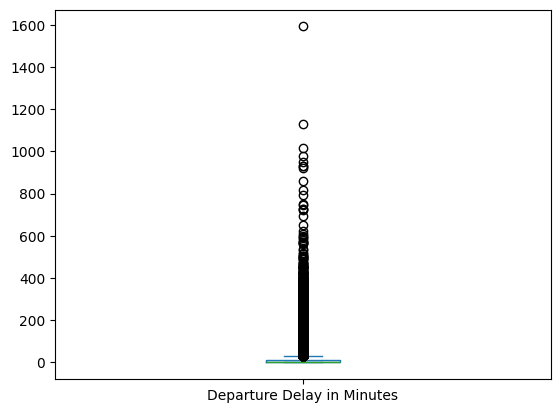

In [31]:
# plotted boxplot of column Departure Delay in Minutes to visualise the outliers.
df["Departure Delay in Minutes"].plot.box()

In [32]:
# checking the quantile value or checking the value at 90%
df["Departure Delay in Minutes"].quantile(0.9)

42.0

In [33]:
# Creating new columns as Dept_Delay & Arr_Delay as the names of column are too long.
df["Dept_Delay"]=df["Departure Delay in Minutes"]
df["Arr_Delay"]= df["Arrival Delay in Minutes"]

In [34]:
# dropping both the columns as this columns are created as Dept_Delay & Arr_Delay.
df.drop(["Departure Delay in Minutes" , "Arrival Delay in Minutes"],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126896 entries, 0 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       126896 non-null  object 
 1   Gender                             126896 non-null  object 
 2   Customer Type                      126896 non-null  object 
 3   Age                                126896 non-null  int64  
 4   Type of Travel                     126896 non-null  object 
 5   Class                              126896 non-null  object 
 6   Flight Distance                    126896 non-null  int64  
 7   Seat comfort                       126896 non-null  int64  
 8   Departure/Arrival time convenient  126896 non-null  int64  
 9   Food and drink                     126896 non-null  int64  
 10  Gate location                      126896 non-null  int64  
 11  Inflight wifi service              126896 no

<Axes: >

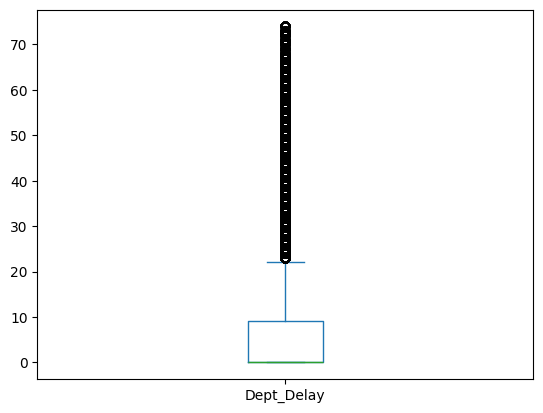

In [36]:
# handling outliers by using quantile at 95% and visualising it by boxplot.
df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.95)]["Dept_Delay"].plot.box()

In [37]:
# Again handling outliers by using quantile at 90% and checking how many rows remain after this.
df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.9)]["Dept_Delay"].shape

(114220,)

In [38]:
# removed outliers of Dept_Delay by applying it in df.
df=df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.9)]

In [39]:
# to get the information of complete dataset after removing outliers of Dept_Delay
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114220 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       114220 non-null  object 
 1   Gender                             114220 non-null  object 
 2   Customer Type                      114220 non-null  object 
 3   Age                                114220 non-null  int64  
 4   Type of Travel                     114220 non-null  object 
 5   Class                              114220 non-null  object 
 6   Flight Distance                    114220 non-null  int64  
 7   Seat comfort                       114220 non-null  int64  
 8   Departure/Arrival time convenient  114220 non-null  int64  
 9   Food and drink                     114220 non-null  int64  
 10  Gate location                      114220 non-null  int64  
 11  Inflight wifi service              114220 no

* 114220 rows remaining after handling outliers in above step.

<Axes: >

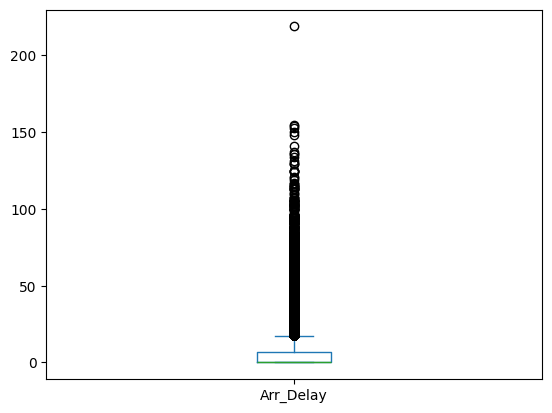

In [40]:
# to check the outliers in Arr_Delay column , boxplot is plotted.
df["Arr_Delay"].plot.box()

<Axes: >

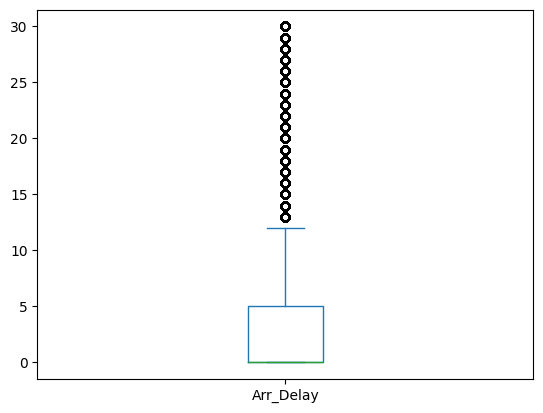

In [41]:
# handling outliers by using quantile at 95% and plotting boxplot of it to visualise
df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].plot.box()

In [42]:
df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].shape
# checking how many rows remain in the dataset below the 95% quantile value of Arr_Delay.

(108465,)

In [43]:
df=df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]
# removing values greater than 95% value of Arr_Delay

In [44]:
# checking the information of dataset after removing outliers from Arr_Delay Column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108465 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       108465 non-null  object 
 1   Gender                             108465 non-null  object 
 2   Customer Type                      108465 non-null  object 
 3   Age                                108465 non-null  int64  
 4   Type of Travel                     108465 non-null  object 
 5   Class                              108465 non-null  object 
 6   Flight Distance                    108465 non-null  int64  
 7   Seat comfort                       108465 non-null  int64  
 8   Departure/Arrival time convenient  108465 non-null  int64  
 9   Food and drink                     108465 non-null  int64  
 10  Gate location                      108465 non-null  int64  
 11  Inflight wifi service              108465 no

* As from the above output we can see that we remain with only 108465 entries after handling the outliers.

<Axes: xlabel='Seat comfort', ylabel='count'>

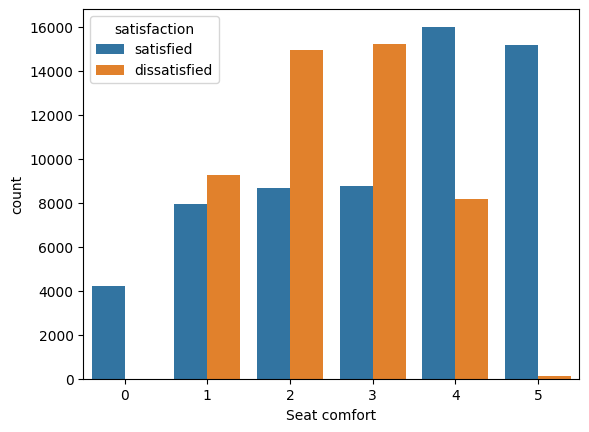

In [45]:
# compared Seat comfort and satisfaction column by ploting countplot
sns.countplot(x=df["Seat comfort"],hue=df["satisfaction"])

* Most of the dissatisfied customer have gave 1, 2, 3 and 4 rating in Seat comfort

<Axes: xlabel='Departure/Arrival time convenient', ylabel='count'>

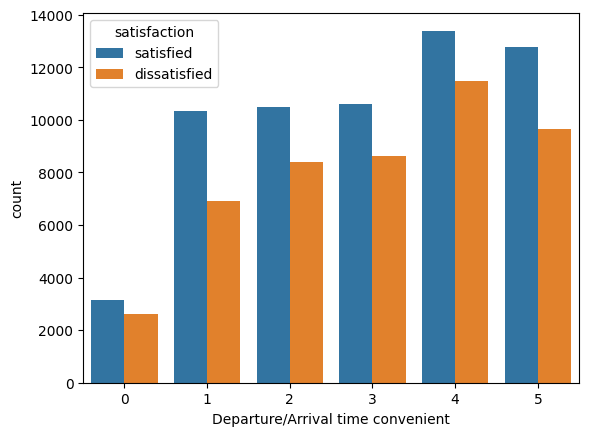

In [46]:
sns.countplot(x=df["Departure/Arrival time convenient"],hue=df["satisfaction"])
# compared Departure/Arrival time convenient with satisfaction column by ploting countplot.

* Most of the time rating 4 is given by both satisfied and dissatisfied customers.

<Axes: xlabel='Food and drink', ylabel='count'>

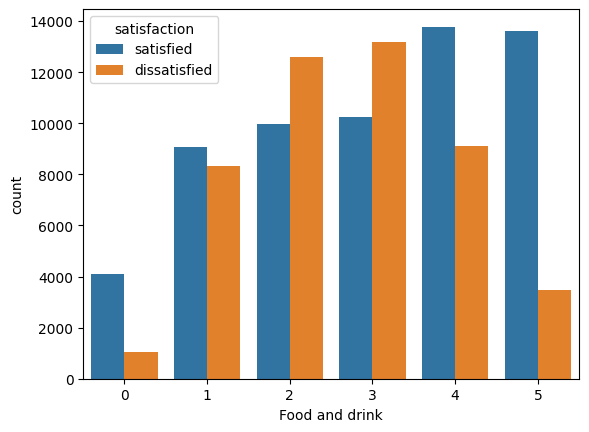

In [47]:
sns.countplot(x=df["Food and drink"],hue=df["satisfaction"])
# compared Food and drink with satisfaction column by ploting countplot.

* The dissatisfied customers have given 2 and 3 rating the most whereas satisfied customers have given 4 and 5

<Axes: xlabel='Gate location', ylabel='count'>

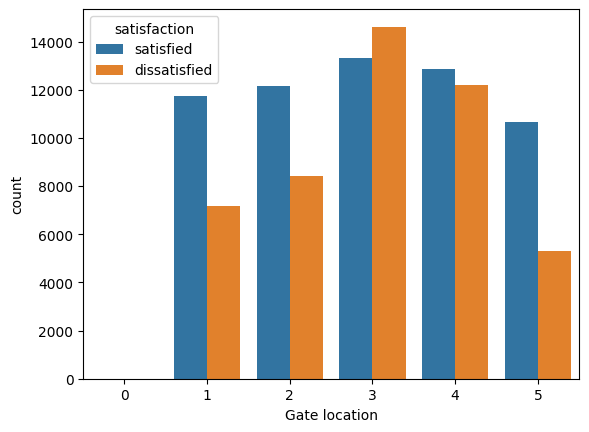

In [48]:
sns.countplot(x=df["Gate location"],hue=df["satisfaction"])
# compared Gate Location and satisfaction column by ploting countplot.

* dissatified customers have given 3 rating the most.

<Axes: xlabel='Inflight wifi service', ylabel='count'>

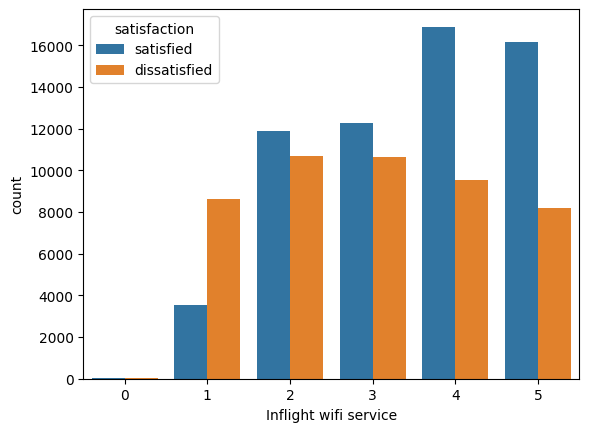

In [49]:
sns.countplot(x=df["Inflight wifi service"],hue=df["satisfaction"])
# compared Inflight wifi service and satisfaction column by ploting countplot

* The maximum time rating 4 and 5 is given by stisfied customers and 2 & 3 by dissatisfied customers.

<Axes: xlabel='Inflight entertainment', ylabel='count'>

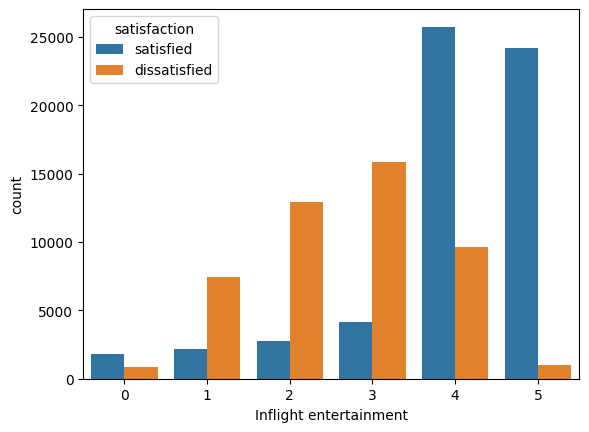

In [50]:
sns.countplot(x=df["Inflight entertainment"],hue=df["satisfaction"])
# compared Inflight entertainment and satisfaction column by ploting countplot.

* dissatisfied customers have given 1,2 and 3 rating in most of the times.

<Axes: xlabel='Online support', ylabel='count'>

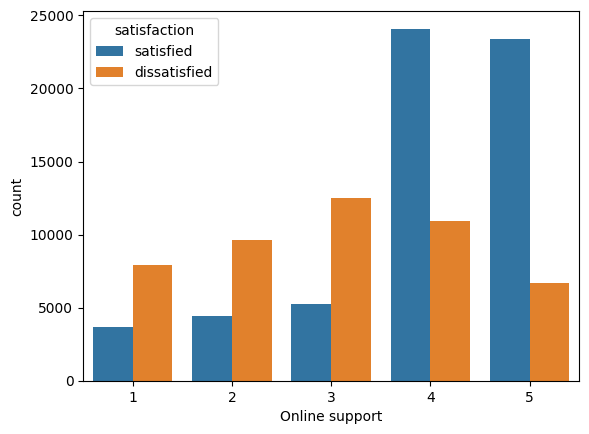

In [51]:
sns.countplot(x=df["Online support"],hue=df["satisfaction"])
# compared Online support with satisfaction column by ploting countplot

* The satisfied customers have given 4 and 5 rating the most.

<Axes: xlabel='Ease of Online booking', ylabel='count'>

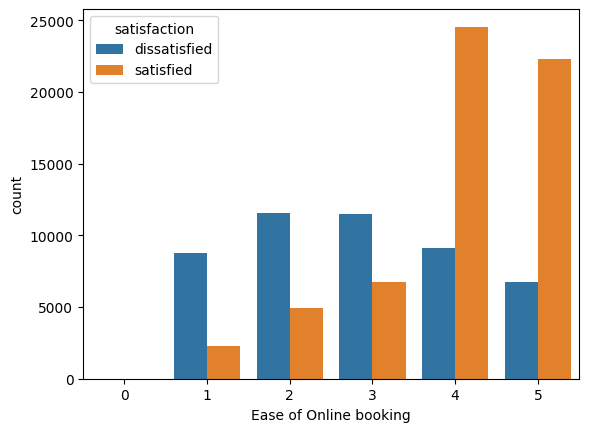

In [52]:
sns.countplot(x=df["Ease of Online booking"],hue=df["satisfaction"])
# compared Ease of Online booking with satisfaction column by ploting countplot

* The satisfied customers have given rating 4 & 5 the most.

<Axes: xlabel='On-board service', ylabel='count'>

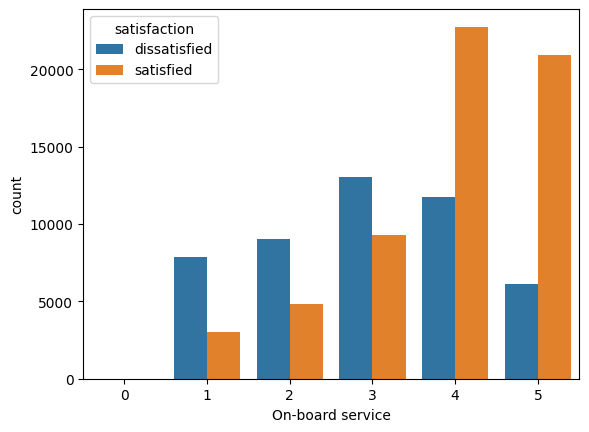

In [53]:
sns.countplot(x=df["On-board service"],hue=df["satisfaction"])
# compared On-board service with satisfaction column by ploting countplot

* Clearly, The dissatisfied customers have given poor ratings whereas satisfied have given good ratings.

<Axes: xlabel='Leg room service', ylabel='count'>

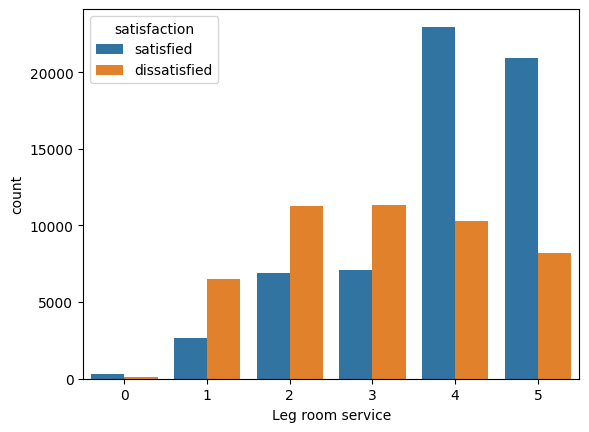

In [54]:
sns.countplot(x=df["Leg room service"],hue=df["satisfaction"])
# compared Leg room service with satisfaction column by ploting countplot

* Clearly, The dissatisfied customers have given poor ratings whereas satisfied have given good ratings.

<Axes: xlabel='Baggage handling', ylabel='count'>

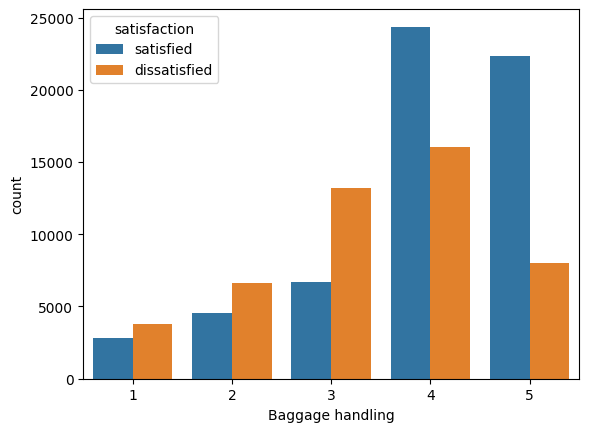

In [55]:
sns.countplot(x=df["Baggage handling"],hue=df["satisfaction"])
# compared Baggage handling with satisfaction.

* Clearly, The dissatisfied customers have given poor ratings whereas satisfied have given good ratings.

<Axes: xlabel='Checkin service', ylabel='count'>

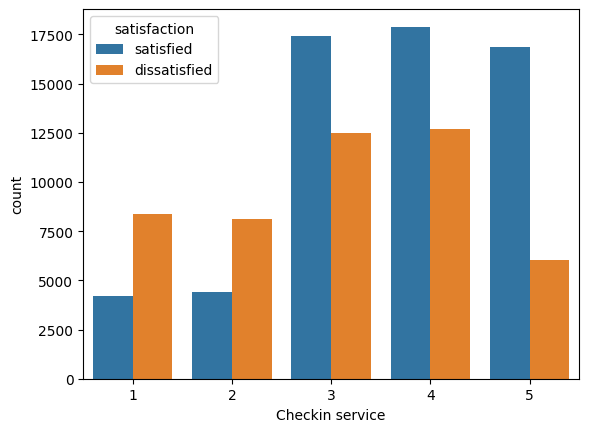

In [56]:
sns.countplot(x=df["Checkin service"],hue=df["satisfaction"])
# ploting Checkin service with satisfaction column.

* Most of the customer who are satisfied have given 3, 4and 5 rating.

<Axes: xlabel='Cleanliness', ylabel='count'>

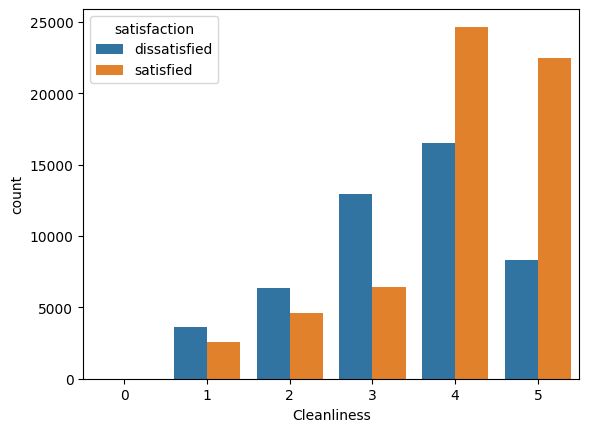

In [57]:
sns.countplot(x=df["Cleanliness"],hue=df["satisfaction"])
# Plotting Cleanliness and satisfaction column.

* Clearly, The dissatisfied customers have given poor ratings whereas satisfied have given good ratings.

<Axes: xlabel='Online boarding', ylabel='count'>

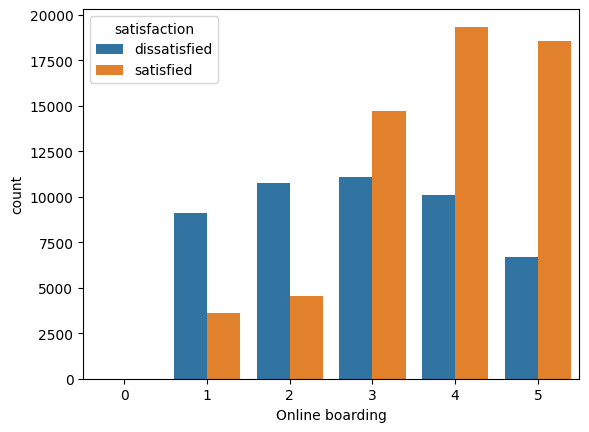

In [58]:
sns.countplot(x=df["Online boarding"],hue=df["satisfaction"])
# plotting Online boarding with satisfaction.

Clearly, The dissatisfied customers have given poor ratings whereas satisfied have given good ratings.

In [59]:
# checking for null values
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
dtype: int64

* There are no null values in any column now.

#### Encoding using Pandas get_dummies

In [60]:
# Encoding using pandas get_dummies
# Giving the Gender column coding like 1 for Male and 0 for Female
# Therefore column name changed to Male
df["Male"]=pd.get_dummies(df["Gender"],dtype="int",drop_first=True)

In [61]:
# as we can see the female became 0 and male became 1 in the column.
df[["Gender","Male"]]

,Gender,Male
0,Female,0
2,Female,0
3,Female,0
4,Female,0
5,Male,1
...,...,...
129869,Female,0
129871,Female,0
129872,Female,0
129874,Female,0


In [62]:
# dropping the column "Gender" as it is of no use now, because we have created a new column called "Male".
df.drop("Gender", axis=1, inplace=True)

In [63]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,5,4,5,5,4,2,0,0.0,1


In [64]:
# The next column to be encoded is "Customer Type".
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

#### Encoding using Lambda function

In [65]:
# Using lambda function the encoding is done and the column name is changed to "Loyal_Customer".
# As the "Customer Type" column has only two categories.
df["Loyal_Customer"] = list(map(lambda x:1 if x[0]=="L" else 0,df["Customer Type"]))

In [66]:
# confiming the above performed operation.i.e. Loyal Customer = 1, disloyal Customer = 0.
df[["Customer Type", "Loyal_Customer"]]

,Customer Type,Loyal_Customer
0,Loyal Customer,1
2,Loyal Customer,1
3,Loyal Customer,1
4,Loyal Customer,1
5,Loyal Customer,1
...,...,...
129869,disloyal Customer,0
129871,disloyal Customer,0
129872,disloyal Customer,0
129874,disloyal Customer,0


In [67]:
# Dropping the column "Customer Type" as it is no longer required.
df.drop("Customer Type", axis=1, inplace=True)

In [68]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,satisfied,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,Personal Travel,Eco,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,Personal Travel,Eco,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [69]:
# Next column to be encoded is "Type of Travel".
df["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [70]:
# Using lambda function the encoding is done and the column name is not changed.
# As the "Customer Type" column has only two categories Personal Travel is given code 1 and Business Travel as 0.
df["Type of Travel"]=list(map(lambda x:1 if x[0]=="P" else 0,df["Type of Travel"]))

In [71]:
df["Type of Travel"].value_counts()

Type of Travel
0    74270
1    34195
Name: count, dtype: int64

In [72]:
# checking for null value
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
Male                                 0
Loyal_Customer                       0
dtype: int64

In [73]:
# Last column to be encoded is "Class"
df["Class"].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [74]:
### Here the column "Class" has 3 categories which are ordered hence we will encode it using label Encoder of sklearn

#### Encoding Using LabelEncoder

In [75]:
# importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [76]:
# calling the function labelEncoder by making an object as le
le = LabelEncoder()

In [77]:
le.fit_transform(df["Class"])

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
# Assigning encoded value as 1, 2 , 3 to class column for eco, Business and ecoplus respectively.
df["Class"]=le.fit_transform(df["Class"])

In [79]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,satisfied,65,1,1,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,1,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,1,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,1,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,1,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [80]:
# to confirm the encoding
df["Class"]

0         1
2         1
3         1
4         1
5         1
         ..
129869    1
129871    1
129872    1
129874    1
129875    1
Name: Class, Length: 108465, dtype: int32

In [81]:
# to confirm the encoding
df["Class"].value_counts()

Class
0    51331
1    49263
2     7871
Name: count, dtype: int64

In [82]:
# checking for null value
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
Male                                 0
Loyal_Customer                       0
dtype: int64

In [83]:
# Encoding the target column using lambda 
# giving value 1 if satisfied and 0 if dissatisfied
df["satisfaction"]=list(map(lambda x:1 if x=="satisfied" else 0,df["satisfaction"]))
df["satisfaction"].value_counts()

satisfaction
1    60765
0    47700
Name: count, dtype: int64

In [84]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,1,65,1,1,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,1,15,1,1,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,1,60,1,1,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,1,70,1,1,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,1,30,1,1,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


# Modeling 

In [85]:
# Assigning all columns except "satisfaction" as input and "satisfaction" column as output.
X = df.drop("satisfaction", axis=1)
y= df["satisfaction"]

In [86]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [87]:
# spliting the data as X_train, y_train for training and X-test, y_test as testing.
#keeping the train_size as 0.75 and random state as 98.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=98)

In [88]:
# importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [89]:
# calling the LogisticRegression function by making an object called model.
model = LogisticRegression()

In [90]:
# fitting the model using training data
model.fit(X_train, y_train)

LogisticRegression()

In [91]:
# Predicting the Target Value for input test data (X_test)
y_pred = model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
# Calculating Accuracy Score
accuracy_score(y_test, y_pred)

0.7602610908286315

In [94]:
# Determining Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[ 7920,  3913],
       [ 2588, 12696]], dtype=int64)

In [95]:
# Printing Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71     11833
           1       0.76      0.83      0.80     15284

    accuracy                           0.76     27117
   macro avg       0.76      0.75      0.75     27117
weighted avg       0.76      0.76      0.76     27117



In [96]:
# Calculating Model Score
model.score(X_train, y_train)

0.7582485125633083

In [97]:
from sklearn.metrics import roc_auc_score , roc_curve

In [98]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.50140375, 0.49859625],
       [0.05393758, 0.94606242],
       [0.44353729, 0.55646271],
       ...,
       [0.57769235, 0.42230765],
       [0.49618814, 0.50381186],
       [0.14533361, 0.85466639]])

In [99]:
# defining fpr (false positive rate), tpr(true positive rate)
fpr,tpr,threshold = roc_curve(y_test, y_pred_prob[:,1])

In [100]:
# calculating auc_score
auc_score = roc_auc_score(y_test, y_pred_prob[:,1])

In [101]:
# fetching auc_score
auc_score

0.8384120672820632

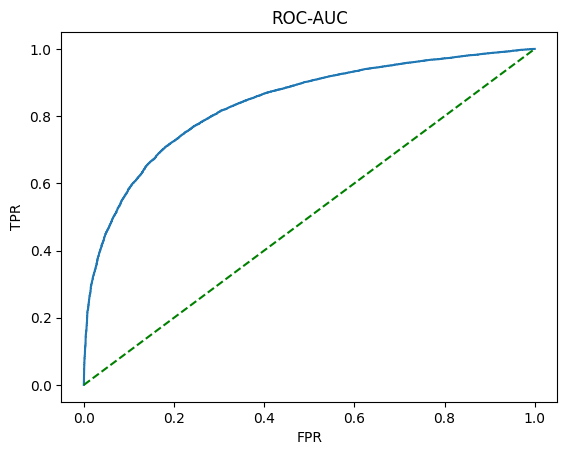

In [102]:
# plotting ROC-AUC curve
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "g--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC")
plt.show()